In [1]:
# creat raw info and montage from scratch

# # https://mne.tools/dev/auto_tutorials/intro/40_sensor_locations.html#sphx-glr-auto-tutorials-intro-40-sensor-locations-py

# https://mne.tools/stable/generated/mne.channels.DigMontage.html#mne.channels.DigMontage

# https://mne.tools/stable/auto_tutorials/simulation/10_array_objs.html#sphx-glr-auto-tutorials-simulation-10-array-objs-py

In [2]:
import numpy as np

import mne

In [3]:
# Create some dummy metadata
n_channels = 256
sampling_freq = 200  # in Hertz
info = mne.create_info(n_channels, sfreq=sampling_freq)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
 chs: 256 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 256
 projs: []
 sfreq: 200.0 Hz
>


In [4]:
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
for montage_name, montage_description in builtin_montages:
    print(f"{montage_name}: {montage_description}")

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

In [5]:
egi256_montage = mne.channels.make_standard_montage("EGI_256")
print(egi256_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 256 channels>


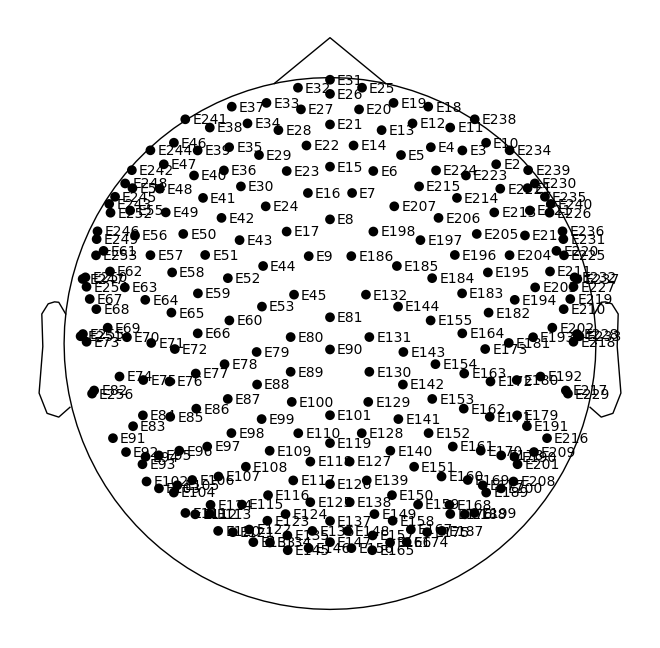

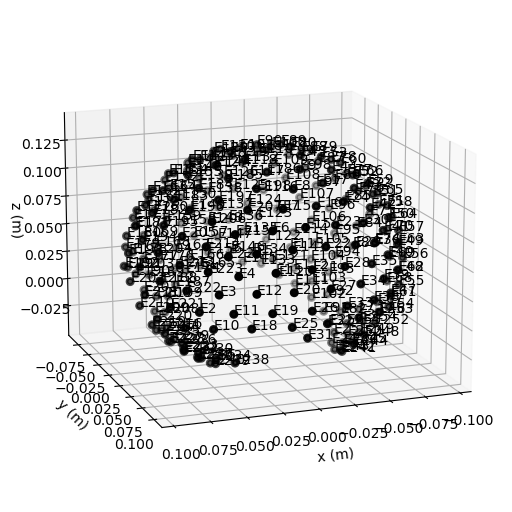

In [6]:
egi256_montage.plot()  # 2D
fig = egi256_montage.plot(kind="3d", show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

In [7]:
ch_names = [f"E{n}" for n in range(1, 257)]
# ch_names = [str(n) for n in range(1, 257)]
ch_types = ["eeg"] * 256
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
info.set_montage("EGI_256",match_case=False,match_alias=False,on_missing='raise')
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 256 EEG
 custom_ref_applied: False
 dig: 259 items (3 Cardinal, 256 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 256
 projs: []
 sfreq: 200.0 Hz
>


In [8]:
info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [9]:
len(info['dig'])

259

In [10]:
info['dig'][2]

<DigPoint |        RPA : (80.0, 0.0, 0.0) mm       : head frame>

In [11]:
info['dig'][3]

<DigPoint |     EEG #1 : (72.9, 57.4, 4.9) mm      : head frame>

In [12]:
from hdf5storage import loadmat, savemat 
outdict=loadmat('egixyz')

In [13]:
outdict.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Coordianates', 'x', 'y', 'z'])

In [14]:
Coordinates=outdict['Coordianates']/1000
x=outdict['x']/100
y=outdict['y']/100
z=outdict['z']/100

In [15]:
len(info['dig'])+1

260

In [16]:
for ch in range(3,len(info['dig'])):
    info['dig'][ch]['r']=Coordinates[ch-3,:]

In [17]:
info['dig'][3]

<DigPoint |     EEG #1 : (67.1, 47.8, 9.0) mm      : head frame>

In [18]:
info["description"] = "My egi dataset"
# info["bads"] = ["O1"]  # Names of bad channels
print(info)

<Info | 9 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 256 EEG
 custom_ref_applied: False
 description: My egi dataset
 dig: 259 items (3 Cardinal, 256 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 256
 projs: []
 sfreq: 200.0 Hz
>


In [19]:
times = np.linspace(0, 200,num=200)
freqs=range(256)
amps=np.linspace(1,0,num=256)
data=np.zeros((256,len(times)))
for f in range(256):
    # data[f,:]=0.00001*np.sin(freqs[f] * np.pi * times)
    data[f,:]=amps[f] * 0.00001* np.sin(freqs[f] * np.pi * times)

In [20]:
times

array([  0.        ,   1.00502513,   2.01005025,   3.01507538,
         4.0201005 ,   5.02512563,   6.03015075,   7.03517588,
         8.04020101,   9.04522613,  10.05025126,  11.05527638,
        12.06030151,  13.06532663,  14.07035176,  15.07537688,
        16.08040201,  17.08542714,  18.09045226,  19.09547739,
        20.10050251,  21.10552764,  22.11055276,  23.11557789,
        24.12060302,  25.12562814,  26.13065327,  27.13567839,
        28.14070352,  29.14572864,  30.15075377,  31.15577889,
        32.16080402,  33.16582915,  34.17085427,  35.1758794 ,
        36.18090452,  37.18592965,  38.19095477,  39.1959799 ,
        40.20100503,  41.20603015,  42.21105528,  43.2160804 ,
        44.22110553,  45.22613065,  46.23115578,  47.2361809 ,
        48.24120603,  49.24623116,  50.25125628,  51.25628141,
        52.26130653,  53.26633166,  54.27135678,  55.27638191,
        56.28140704,  57.28643216,  58.29145729,  59.29648241,
        60.30150754,  61.30653266,  62.31155779,  63.31

In [21]:
data[90,:]

array([ 0.00000000e+00,  6.39795416e-06,  1.91188703e-06, -5.82662903e-06,
       -3.65304618e-06,  4.73499702e-06,  5.06799526e-06, -3.22053878e-06,
       -6.03038201e-06,  1.41849256e-06,  6.45426712e-06,  5.10222353e-07,
       -6.30179846e-06, -2.39337538e-06,  5.58659119e-06,  4.06280453e-06,
       -4.37251196e-06, -5.36943298e-06,  2.76797573e-06,  6.19658127e-06,
       -9.16264537e-07, -6.47038666e-06, -1.01726734e-06,  6.16639882e-06,
        2.85995917e-06, -5.31176331e-06, -4.44726210e-06,  3.98279744e-06,
        5.63743298e-06, -2.29817534e-06, -6.32419183e-06,  4.08330556e-07,
        6.44621238e-06,  1.51797737e-06, -5.99259843e-06, -3.30873281e-06,
        5.00385685e-06,  4.80402470e-06, -3.56828037e-06, -5.87032633e-06,
        1.81406325e-06,  6.41241899e-06,  1.02146272e-07, -6.38189484e-06,
       -2.00923432e-06,  5.78147962e-06,  3.73690157e-06, -4.66478927e-06,
       -5.13087063e-06,  3.13154213e-06,  6.06666269e-06, -1.31865422e-06,
       -6.46071333e-06, -

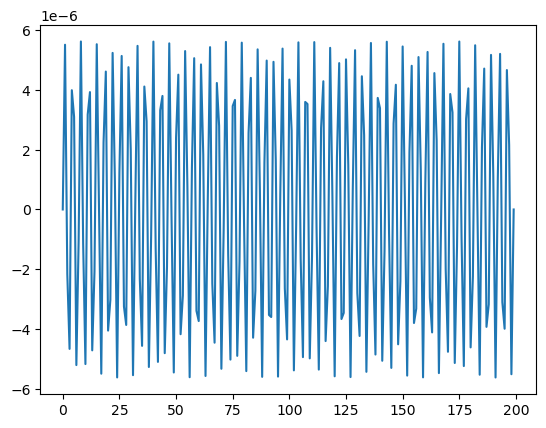

In [22]:
from matplotlib import pyplot as plt
plt.plot(data[112,:])

In [23]:
simulated_raw = mne.io.RawArray(data, info)
simulated_raw.plot(show_scrollbars=False, show_scalebars=False)

Creating RawArray with float64 data, n_channels=256, n_times=200
    Range : 0 ... 199 =      0.000 ...     0.995 secs
Ready.


Using qt as 2D backend.


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""


In [24]:
# rereferenced_raw, ref_data = mne.set_eeg_reference(simulated_raw, ref_channels='average', copy=False)
# fig_orig = simulated_raw.plot()
# fig_reref = rereferenced_raw.plot()

In [25]:
simulated_raw.set_eeg_reference('average', projection=True)



EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<RawArray | 256 x 200 (1.0 s), ~747 kB, data loaded>

In [26]:
times = np.linspace(0, 1, sampling_freq, endpoint=False)
nepoch = 5

data = np.array(
    [
        [0.00001*np.sin(freqs[f] * np.pi * times)
        for f in range(256)] 
    for n in range(nepoch)
    ]
)

simulated_epochs = mne.EpochsArray(data, info)
simulated_epochs.plot(picks="eeg", show_scrollbars=False)

Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated


In [27]:
print(simulated_epochs.events[:, -1])

[1 1 1 1 1]


In [28]:
events = np.column_stack(
    (
        np.arange(0, 1000, sampling_freq),
        np.zeros(5, dtype=int),
        np.array([1, 2, 1, 2, 1]),
    )
)
event_dict = dict(condition_A=1, condition_B=2)
simulated_epochs = mne.EpochsArray(
    data, info, tmin=-0.5, events=events, event_id=event_dict
)
simulated_epochs.plot(
    picks="eeg", show_scrollbars=False, events=events, event_id=event_dict
)

Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated


In [29]:
events

array([[  0,   0,   1],
       [200,   0,   2],
       [400,   0,   1],
       [600,   0,   2],
       [800,   0,   1]])

<Evoked | 'simulated' (average, N=5), -0.5 – 0.495 sec, baseline off, 256 ch, ~741 kB>


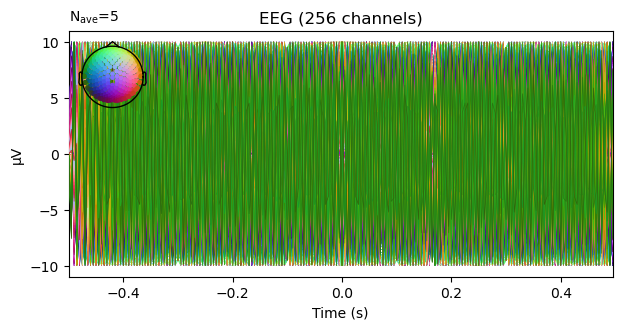

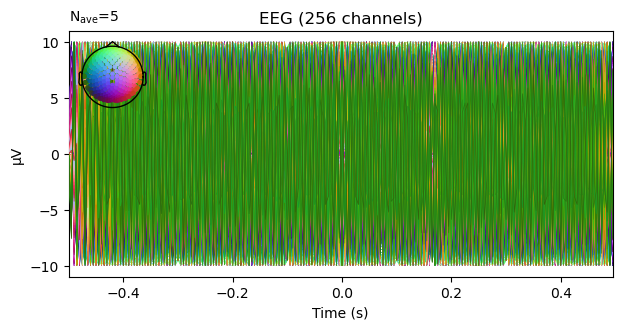

In [30]:
# Create the Evoked object
evoked_array = mne.EvokedArray(
    data.mean(axis=0), info, tmin=-0.5, nave=data.shape[0], comment="simulated"
)
print(evoked_array)
evoked_array.plot()

Effective window size : 0.640 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/tmp/ipykernel_1558363/3715135260.py:44: UserWarning: Infinite value in PSD for channel E1.
These channels might be dead.
  spectrum.plot(picks=[0, 1], spatial_colors=True, exclude="bads")
/home/zhibinz2/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


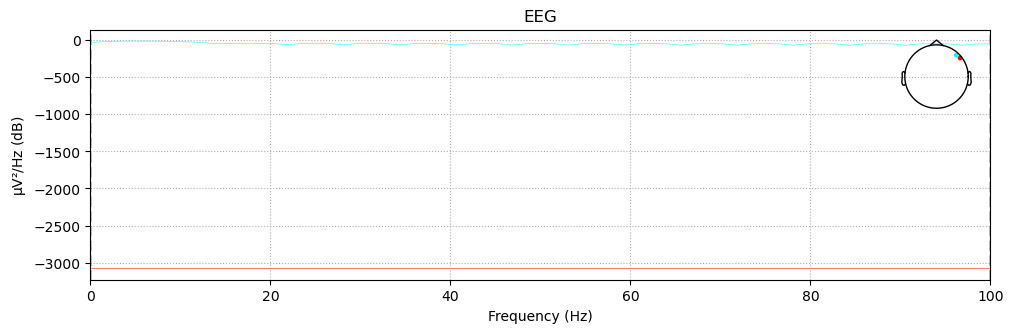

Dropped 0 epochs: 


Effective window size : 0.640 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/tmp/ipykernel_1562302/3715135260.py:44: UserWarning: Infinite value in PSD for channel E1.
These channels might be dead.
  spectrum.plot(picks=[0, 1], spatial_colors=True, exclude="bads")
/home/zhibinz2/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


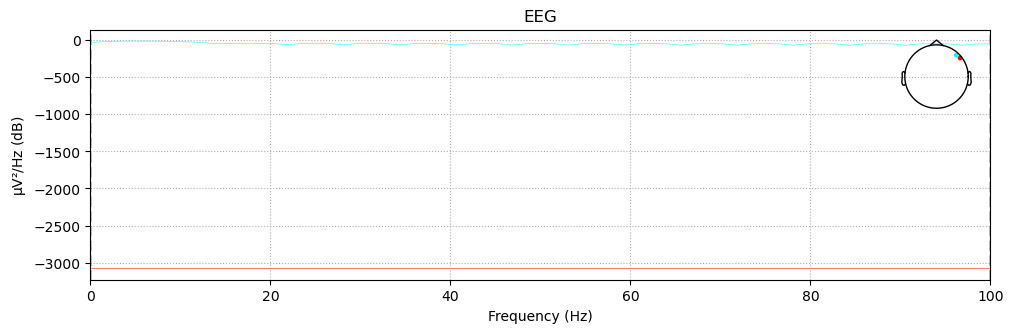

In [31]:
# compute power spectrum

psd, freqs = mne.time_frequency.psd_array_welch(
    data, info["sfreq"], n_fft=128, n_per_seg=32
)

psd_ave = psd.mean(0)

# map to `~mne.time_frequency.Spectrum` class and explore API


def spectrum_from_array(
    data: np.ndarray,  # spectral features
    freqs: np.ndarray,  # frequencies
    inst_info: mne.Info,  # the meta data of MNE instance
) -> mne.time_frequency.Spectrum:  # Spectrum object
    """Create MNE averaged power spectrum object from custom data"""
    state = dict(
        method="my_welch",
        data=data,
        sfreq=inst_info["sfreq"],
        dims=("channel", "freq"),
        freqs=freqs,
        inst_type_str="Raw",
        data_type="Averaged Power Spectrum",
        info=inst_info,
    )
    defaults = dict(
        method=None,
        fmin=None,
        fmax=None,
        tmin=None,
        tmax=None,
        picks=None,
        proj=None,
        reject_by_annotation=None,
        n_jobs=None,
        verbose=None,
    )
    return mne.time_frequency.Spectrum(state, **defaults)


spectrum = spectrum_from_array(data=psd_ave, freqs=freqs, inst_info=info)
spectrum.plot(picks=[0, 1], spatial_colors=True, exclude="bads")

In [32]:
# https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.save
simulated_raw.save("egi_raw.fif",overwrite=True)
# rereferenced_raw.save("egi_raw.fif",overwrite=True)


Overwriting existing file.
Writing /home/zhibinz2/Documents/GitHub/MEG_EEG_Source_Localization/test_scripts/EEG_chan/egi_raw.fif
Closing /home/zhibinz2/Documents/GitHub/MEG_EEG_Source_Localization/test_scripts/EEG_chan/egi_raw.fif
[done]
